<a href="https://colab.research.google.com/github/Narichie/How_Kernels_used_in_Convolution_Affect_the-Accuracy_of_Neural_Network/blob/main/Kernels_And_Model_Performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Kernels and Model Performance.

# How do the characteristics of kernels (weights) used in a convolution affect the accuracy of a neural network?

# **GOAL: Examining the impact of the characteristics of kernels (weights) in a convolution layer on the accuracy of a CNN.**

__________________
# **Objectives**
___________________
I will use the MNIST dataset to construct and train a FeedForward Neural Network. I will apply specific kernels designed to train three models and analyze their performance.

I will construct three versions of kernels and see their application on two images.

A basilica:


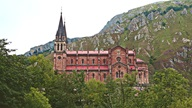

And a doctor:

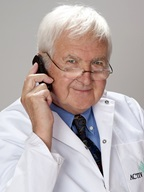

# Image uploading and Importing libraries

In [ ]:
pip install opencv-python

  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/66/82/564168a349148298aca281e342551404ef5521f33fba17b388ead0a84dc5/opencv_python-4.10.0.84-cp37-abi3-macosx_11_0_arm64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.8/54.8 MB 30.2 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg

In [ ]:
# Uploading "basilica.jpg"
basilica = cv2.imread('basilica.jpg')


In [ ]:
# Uploading "medic.jpg"
medic = cv2.imread('medic.jpg')



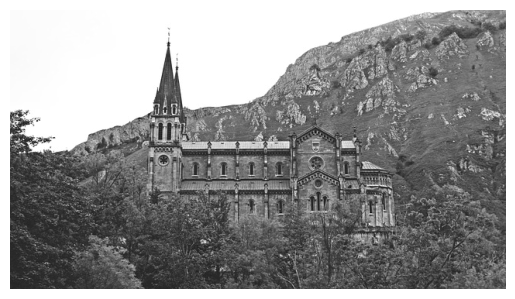

In [ ]:
# Reading and Visualizing the basilica image in grayscale
image_gray = cv2.imread('basilica.jpg', cv2.IMREAD_GRAYSCALE)

# Display the grayscale image using Matplotlib
plt.imshow(image_gray, cmap='gray')
plt.axis('off')  # Turn off axis labels
plt.show()

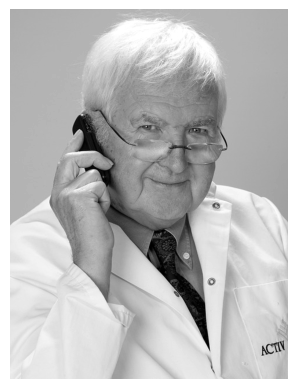

In [ ]:
# Reading and Visualizing the medic image in grayscale
image_gray = cv2.imread('medic.jpg', cv2.IMREAD_GRAYSCALE)

# Display the grayscale image using Matplotlib
plt.imshow(image_gray, cmap='gray')
plt.axis('off')  # Turn off axis labels
plt.show()

## **Defining the kernels and observing the results after applying them**

Now, it is time to define the kernels. I will design three 3x3 ones:

1) A baseline kernel. Here, I suggest creating a vertical, "neutral" filter, such as a Prewitt filter:


\begin{bmatrix}
1 & 0 & -1 \\
1 & 0 & -1 \\
1 & 0 & -1 \\
\end{bmatrix}


2) Another vertical kernel with lower values:

\begin{bmatrix}
0.3 & 0 & -0.3 \\
0.3 & 0 & -0.3 \\
0.3 & 0 & -0.3 \\
\end{bmatrix}

2) A final vertical kernel with higher values for extracting vertical edges.

\begin{bmatrix}
10 & 0 & -10 \\
10 & 0 & -10 \\
10 & 0 & -10 \\
\end{bmatrix}


In [ ]:
import numpy as np
import ipywidgets as widgets
from IPython.display import display

# Global variables for storing matrices
baseline_kernel = None
low_value_kernel = None
high_value_kernel = None

# Define widgets for each value in the matrices
matrix_inputs = [[widgets.FloatText(description=f"({i},{j})") for j in range(3)] for i in range(3)]
matrix_inputs_low = [[widgets.FloatText(description=f"({i},{j})") for j in range(3)] for i in range(3)]
matrix_inputs_high = [[widgets.FloatText(description=f"({i},{j})") for j in range(3)] for i in range(3)]

# Display input widgets for each matrix with a description
print("Enter values for the Baseline Kernel (3x3):")
for row in matrix_inputs:
    display(widgets.HBox(row))

print("\nEnter values for the Low Value Kernel (3x3):")
for row in matrix_inputs_low:
    display(widgets.HBox(row))

print("\nEnter values for the High Value Kernel (3x3):")
for row in matrix_inputs_high:
    display(widgets.HBox(row))

# Function to retrieve values from input fields, create matrices, and reshape them
def create_matrices():
    # Create the simpleline kernel from user inputs
    baseline_kernel = np.array([[cell.value for cell in row] for row in matrix_inputs])

    # Create the low value kernel from user inputs
    low_value_kernel = np.array([[cell.value for cell in row] for row in matrix_inputs_low])

    # Create the high value kernel from user inputs
    high_value_kernel = np.array([[cell.value for cell in row] for row in matrix_inputs_high])



    # Display the matrices
    print("\nGenerated Matrices:")
    print("Baseline Kernel:\n", baseline_kernel, "Name of this matrix: baseline_kernel")
    print("\nLow Value Kernel:\n", low_value_kernel, "Name of this matrix: low_value_kernel")
    print("\nHigh Value Kernel:\n", high_value_kernel, "Name of this matrix: high_value_kernel")

    return baseline_kernel, low_value_kernel, high_value_kernel

# Create a button to generate matrices
generate_button = widgets.Button(description="Generate Matrices")

# Define what happens when the button is clicked
def on_button_click(b):
    global baseline_kernel, low_value_kernel, high_value_kernel  # Declare global variables
    baseline_kernel, low_value_kernel, high_value_kernel = create_matrices()

generate_button.on_click(on_button_click)

# Display the button
display(generate_button)




Enter values for the Baseline Kernel (3x3):



Enter values for the Low Value Kernel (3x3):



Enter values for the High Value Kernel (3x3):


Button(description='Generate Matrices', style=ButtonStyle())

I will apply these three kernels to the basilica and medic images.

I will start with the "basilica" image:

In [ ]:
basilica1 = cv2.filter2D(basilica,-1,baseline_kernel)
basilica2 = cv2.filter2D(basilica,-1,low_value_kernel)
basilica3 = cv2.filter2D(basilica,-1,high_value_kernel)
frame_basilica=cv2.hconcat((basilica1,basilica2,basilica3))


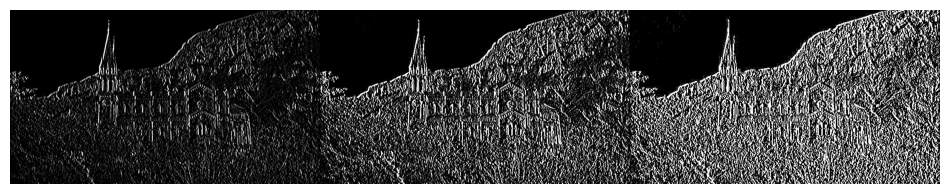

In [ ]:
# Convert the image from BGR to RGB for Matplotlib
frame_basilica = cv2.cvtColor(frame_basilica, cv2.COLOR_BGR2RGB)

# Display the concatenated image
plt.figure(figsize=(12, 6))
plt.imshow(frame_basilica)
plt.axis('off')  # Turn off axis labels
plt.show()

I will show the results for "medic" image

In [ ]:
medic1 = cv2.filter2D(medic,-1,baseline_kernel)
medic2 = cv2.filter2D(medic,-1,low_value_kernel)
medic3 = cv2.filter2D(medic,-1,high_value_kernel)
frame_medic=cv2.hconcat((medic1,medic2,medic3))

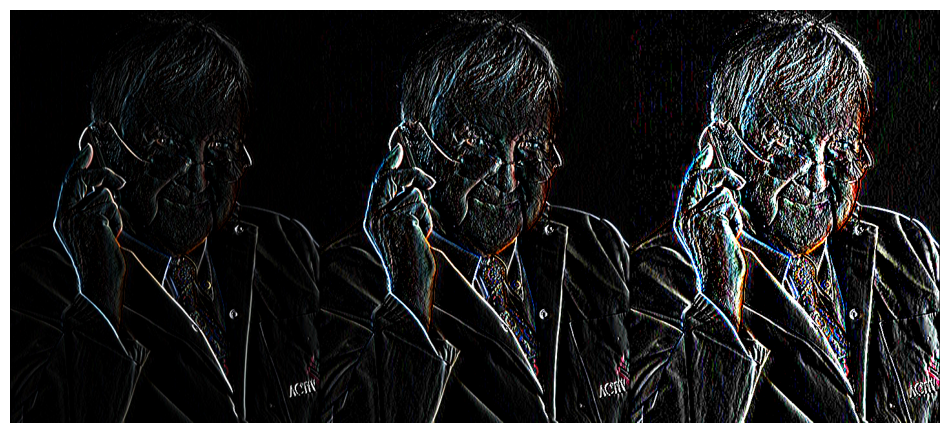

In [ ]:
# Convert the image from BGR to RGB for Matplotlib
frame_medic = cv2.cvtColor(frame_medic, cv2.COLOR_BGR2RGB)

# Display the concatenated image
plt.figure(figsize=(12, 6))
plt.imshow(frame_medic)
plt.axis('off')  # Turn off axis labels
plt.show()

## **APPLYING THE DESIGNED KERNELS TO A FEEDFORWARD NEURAL NETWORK FOR THE MNIST IMAGES**

In [ ]:
# Importing the necessary libraries.
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import pandas as pd
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import ipywidgets as widgets
from IPython.display import display
from sklearn.metrics import classification_report

# Keras Sequential Model
from tensorflow.keras.models import Sequential

# Importing layer types and optimizers
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Activation, LeakyReLU
from tensorflow.keras.optimizers import Adam,SGD

# The following code can be used to ignore warnings that may occur due to deprecations.
import warnings
warnings.filterwarnings("ignore")

First, I will train a model called "baseline_model" by focusing on the resulting accuracy.

11490434/11490434 [==============================] - 0s 0us/step


Epoch 1/15
844/844 - 1s - loss: 0.2353 - accuracy: 0.9285 - val_loss: 0.1302 - val_accuracy: 0.9603 - 1s/epoch - 1ms/step
Epoch 2/15
844/844 - 1s - loss: 0.1363 - accuracy: 0.9596 - val_loss: 0.1381 - val_accuracy: 0.9620 - 795ms/epoch - 942us/step
Epoch 3/15
844/844 - 1s - loss: 0.1119 - accuracy: 0.9679 - val_loss: 0.1268 - val_accuracy: 0.9682 - 779ms/epoch - 922us/step
Epoch 4/15
844/844 - 1s - loss: 0.1051 - accuracy: 0.9686 - val_loss: 0.1363 - val_accuracy: 0.9637 - 760ms/epoch - 900us/step
Epoch 5/15
844/844 - 1s - loss: 0.0970 - accuracy: 0.9728 - val_loss: 0.1339 - val_accuracy: 0.9670 - 922ms/epoch - 1ms/step
Epoch 6/15
844/844 - 1s - loss: 0.0871 - accuracy: 0.9757 - val_loss: 0.1144 - val_accuracy: 0.9697 - 837ms/epoch - 992us/step
Epoch 7/15
844/844 - 1s - loss: 0.0820 - accuracy: 0.9773 - val_loss: 0.1496 - val_accuracy: 0.9723 - 793ms/epoch - 940us/step
Epoch 8/15
844/844 - 1s - loss: 0.0825 - accuracy: 0.9780 - val_loss: 0.1497 - val_accuracy: 0.9712 - 797ms/epoch - 94

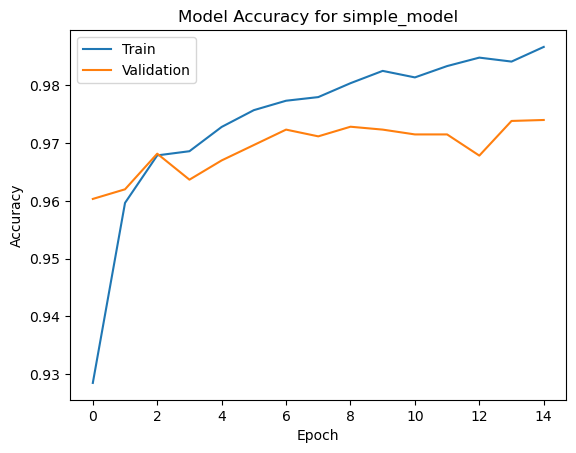

313/313 - 0s - loss: 0.2339 - accuracy: 0.9686 - 113ms/epoch - 361us/step
313/313 [==============================] - 0s 313us/step
CLASSIFICATION REPORT FOR SIMPLE_MODEL
             precision  recall f1-score     support
0               0.9827  0.9878   0.9852    980.0000
1               0.9929  0.9806   0.9867   1135.0000
2               0.9697  0.9603   0.9649   1032.0000
3               0.9700  0.9594   0.9647   1010.0000
4               0.9573  0.9817   0.9693    982.0000
5               0.9611  0.9697   0.9654    892.0000
6               0.9700  0.9791   0.9745    958.0000
7               0.9391  0.9747   0.9566   1028.0000
8               0.9587  0.9538   0.9563    974.0000
9               0.9834  0.9386   0.9604   1009.0000
accuracy        0.9686  0.9686   0.9686      0.9686
macro avg       0.9685  0.9686   0.9684  10000.0000
weighted avg    0.9688  0.9686   0.9686  10000.0000


In [ ]:
# Clearing the Backend
from tensorflow.keras import backend
backend.clear_session()
# Setting the seed for random number generators ensures we get the same result each time.
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

# Loading the dataset
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# Change the dimension to have a single-channel
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))
# Normalizing pixels of image
X_train_normalized = X_train.astype('float32')/255.0
X_test_normalized = X_test.astype('float32')/255.0
# Creating a "one-hot encoded" representation of the target labels.
y_train_encoded = tf.keras.utils.to_categorical(y_train)
y_test_encoded = tf.keras.utils.to_categorical(y_test)

# BASELINE MODEL

basic_model = Sequential()
basic_model.add(Flatten(input_shape=(28, 28)))
basic_model.add(Dense(100, activation='relu'))
basic_model.add(Dense(10, activation='softmax'))
opt = Adam(learning_rate=0.01)
# Compiling the model
basic_model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#Training the model
history = basic_model.fit(
            X_train_normalized, y_train_encoded,
            epochs=15,
            validation_split=0.1,
            shuffle=True,
            batch_size=64,
            verbose=2)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy for basic_model')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Estimating predictions
accuracy = basic_model.evaluate(X_test_normalized, y_test_encoded, verbose=2)
#Generating the Classification Report
basic_model.evaluate(X_test_normalized,y_test_encoded)
y_test_pred_basic_model = basic_model.predict(X_test_normalized)
y_test_pred__basic_model_classes = np.argmax(y_test_pred_basic_model, axis=1)
from sklearn.metrics import classification_report
report = classification_report(y_test, y_test_pred__basic_model_classes , output_dict=True)
# Converting to DataFrame for tabular format
report_df = pd.DataFrame(report).transpose()
# Formatting the DataFrame to four decimal places
report_df = report_df.applymap(lambda x: f"{x:.4f}" if isinstance(x, float) else x)
# Printing the formatted DataFrame
print('================================================================')
print("CLASSIFICATION REPORT FOR BASIC_MODEL")
print(report_df)
print('================================================================')


The above output presents details on model performance metrics along with a classification report following the evaluation of the model.

The model achieved an impressive accuracy of 96.86% on the test set, indicative ooverall solidll performance.

The reported loss value of 0.2339 is relatively low, suggesthat the model is well-optimized.


In [ ]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.8/50.8 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.4/149.4 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 MB 36.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.1/320.1 kB 27.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 447.5/447.5 kB 30.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 266.4/266.4 kB 29.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 434.9/434.9 kB 36.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 39.0 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 42.2 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.3/73.3 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.2/44.2 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━

In [ ]:
import gradio as gr

# Clearing the backend session to reset the model
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

# Defining kernels as numpy arrays
baseline_kernel = np.random.rand(3, 3, 1, 1)
low_value_kernel = np.random.rand(3, 3, 1, 1)
high_value_kernel = np.random.rand(3, 3, 1, 1)

# Loading and preprocessing the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1)).astype('float32') / 255.0
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1)).astype('float32') / 255.0
y_train_encoded = tf.keras.utils.to_categorical(y_train)
y_test_encoded = tf.keras.utils.to_categorical(y_test)

# This function will process and train model based on selected kernel
def process_and_train_model(selected_kernel_name):
    # Select the kernel based on user input
    if selected_kernel_name == 'baseline_kernel':
        selected_kernel = baseline_kernel
    elif selected_kernel_name == 'low_value_kernel':
        selected_kernel = low_value_kernel
    elif selected_kernel_name == 'high_value_kernel':
        selected_kernel = high_value_kernel

    # Applying the "convolution" with the selected kernel to the dataset
    X_train_filtered = tf.nn.conv2d(X_train, selected_kernel, strides=[1, 1, 1, 1], padding='SAME')
    X_test_filtered = tf.nn.conv2d(X_test, selected_kernel, strides=[1, 1, 1, 1], padding='SAME')
    X_train_filtered_np = X_train_filtered.numpy().reshape(X_train_filtered.shape[0], 28, 28)
    X_test_filtered_np = X_test_filtered.numpy().reshape(X_test_filtered.shape[0], 28, 28)

    # Defining and compiling the baseline model
    baseline = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(100, activation='relu'),
        Dense(10, activation='softmax')
    ])
    baseline.compile(optimizer=Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

    # Training the model
    history = baseline.fit(
        X_train_filtered_np, y_train_encoded,
        epochs=15,
        validation_split=0.1,
        shuffle=True,
        batch_size=64,
        verbose=2
    )

    # Plotting training accuracy
    plt.figure()
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.savefig('accuracy_plot.png')
    plt.close()

    # Evaluating and generating classification report
    test_accuracy = baseline.evaluate(X_test_filtered_np, y_test_encoded, verbose=2)
    y_test_pred_baseline = baseline.predict(X_test_filtered_np)
    y_test_pred_baseline_classes = np.argmax(y_test_pred_baseline, axis=1)
    report = classification_report(y_test, y_test_pred_baseline_classes, output_dict=True)

    # Extract only general metrics
    general_metrics = {
        "Metric": ["Accuracy", "Precision (macro avg)", "Recall (macro avg)", "F1-Score (macro avg)"],
        "Score": [
            report["accuracy"],
            report["macro avg"]["precision"],
            report["macro avg"]["recall"],
            report["macro avg"]["f1-score"]
        ]
    }

    # Converting general metrics to DataFrame and format to four decimal places
    general_metrics_df = pd.DataFrame(general_metrics)
    general_metrics_df["Score"] = general_metrics_df["Score"].apply(lambda x: f"{x:.4f}")

    return 'accuracy_plot.png', general_metrics_df

# Gradio interface launching
with gr.Blocks() as demo:
    gr.Markdown("# CNN Kernel Selection and Model Training")

    kernel_dropdown = gr.Dropdown(
        ["baseline_kernel", "low_value_kernel", "high_value_kernel"],
        label="Select Kernel",
        value="baseline_kernel"
    )

    submit_button = gr.Button("Submit")

    accuracy_plot = gr.Image()
    classification_report_table = gr.DataFrame()

    submit_button.click(
        process_and_train_model,
        inputs=[kernel_dropdown],
        outputs=[accuracy_plot, classification_report_table]
    )

demo.launch()

Running on local URL:  http://127.0.0.1:7861

To create a public link, set `share=True` in `launch()`.


IMPORTANT: You are using gradio version 4.19.2, however version 4.44.1 is available, please upgrade.
--------


Epoch 1/15
844/844 - 2s - loss: 0.3085 - accuracy: 0.9101 - val_loss: 0.1877 - val_accuracy: 0.9495 - 2s/epoch - 2ms/step
Epoch 2/15
844/844 - 1s - loss: 0.2176 - accuracy: 0.9385 - val_loss: 0.1891 - val_accuracy: 0.9535 - 802ms/epoch - 951us/step
Epoch 3/15
844/844 - 1s - loss: 0.2062 - accuracy: 0.9430 - val_loss: 0.1908 - val_accuracy: 0.9530 - 782ms/epoch - 927us/step
Epoch 4/15
844/844 - 1s - loss: 0.2020 - accuracy: 0.9454 - val_loss: 0.1786 - val_accuracy: 0.9540 - 781ms/epoch - 926us/step
Epoch 5/15
844/844 - 1s - loss: 0.1998 - accuracy: 0.9465 - val_loss: 0.1949 - val_accuracy: 0.9472 - 782ms/epoch - 926us/step
Epoch 6/15
844/844 - 1s - loss: 0.1928 - accuracy: 0.9481 - val_loss: 0.1963 - val_accuracy: 0.9548 - 802ms/epoch - 951us/step
Epoch 7/15
844/844 - 1s - loss: 0.2005 - accuracy: 0.9472 - val_loss: 0.2018 - val_accuracy: 0.9468 - 778ms/epoch - 921us/step
Epoch 8/15
844/844 - 1s - loss: 0.1861 - accuracy: 0.9505 - val_loss: 0.1523 - val_accuracy: 0.9637 - 743ms/epoch - 

Epoch 1/15
844/844 - 1s - loss: 0.2898 - accuracy: 0.9150 - val_loss: 0.1534 - val_accuracy: 0.9562 - 1s/epoch - 1ms/step
Epoch 2/15
844/844 - 1s - loss: 0.2092 - accuracy: 0.9409 - val_loss: 0.2300 - val_accuracy: 0.9377 - 755ms/epoch - 894us/step
Epoch 3/15
844/844 - 1s - loss: 0.1894 - accuracy: 0.9468 - val_loss: 0.1566 - val_accuracy: 0.9612 - 726ms/epoch - 860us/step
Epoch 4/15
844/844 - 1s - loss: 0.1887 - accuracy: 0.9487 - val_loss: 0.1518 - val_accuracy: 0.9603 - 647ms/epoch - 766us/step
Epoch 5/15
844/844 - 1s - loss: 0.1837 - accuracy: 0.9511 - val_loss: 0.1921 - val_accuracy: 0.9498 - 661ms/epoch - 783us/step
Epoch 6/15
844/844 - 1s - loss: 0.1736 - accuracy: 0.9543 - val_loss: 0.1852 - val_accuracy: 0.9517 - 679ms/epoch - 804us/step
Epoch 7/15
844/844 - 1s - loss: 0.1755 - accuracy: 0.9539 - val_loss: 0.1515 - val_accuracy: 0.9600 - 975ms/epoch - 1ms/step
Epoch 8/15
844/844 - 1s - loss: 0.1700 - accuracy: 0.9553 - val_loss: 0.1766 - val_accuracy: 0.9595 - 683ms/epoch - 80

Epoch 1/15
844/844 - 1s - loss: 0.3143 - accuracy: 0.9100 - val_loss: 0.1837 - val_accuracy: 0.9455 - 1s/epoch - 1ms/step
Epoch 2/15
844/844 - 1s - loss: 0.2108 - accuracy: 0.9405 - val_loss: 0.2333 - val_accuracy: 0.9417 - 866ms/epoch - 1ms/step
Epoch 3/15
844/844 - 1s - loss: 0.1995 - accuracy: 0.9445 - val_loss: 0.1842 - val_accuracy: 0.9548 - 866ms/epoch - 1ms/step
Epoch 4/15
844/844 - 1s - loss: 0.1937 - accuracy: 0.9466 - val_loss: 0.1657 - val_accuracy: 0.9558 - 766ms/epoch - 908us/step
Epoch 5/15
844/844 - 1s - loss: 0.1782 - accuracy: 0.9513 - val_loss: 0.1569 - val_accuracy: 0.9588 - 876ms/epoch - 1ms/step
Epoch 6/15
844/844 - 1s - loss: 0.1884 - accuracy: 0.9511 - val_loss: 0.1997 - val_accuracy: 0.9518 - 800ms/epoch - 948us/step
Epoch 7/15
844/844 - 1s - loss: 0.1770 - accuracy: 0.9533 - val_loss: 0.1618 - val_accuracy: 0.9623 - 775ms/epoch - 918us/step
Epoch 8/15
844/844 - 1s - loss: 0.1750 - accuracy: 0.9537 - val_loss: 0.1666 - val_accuracy: 0.9600 - 824ms/epoch - 976us/

**Assessing the effect of each kernel type on model performance**


**Baseline Model**

* Accuracy: 0.9534
* Precision (macro avg): 0.9538
* Recall (macro avg): 0.9526
* F1-Score: 0.9529

* The baseline model showcases exceptional metrics across the board, highlighting its robust performance even before introducing kernel preprocessing.


**Low-level Kernel Performance**

* Accuracy: 0.9518 (Slight decrease)
* Precision: 0.9532 (Slight decrease)
* Recall:  0.9505 (Decrease)
* F1-Score: 0.9512 (Decrease)

The Low-level Kernel shows a minor decrease in performance across all metrics relative to the baseline. This suggests that its transformations may be smoothing or distorting key features, limiting the model’s ability to discern important details accurately.



**High-level Kernel Performance**

* Accuracy: 0.9529 (Slight decrease)
* Precision: 0.9532 (Slight decrease)
* Recall: 0.9525 (Slight decrease)
* F1-Score: 0.9526 (Slight decrease)

The high-level Kernel slightly affects performance. The small changes compared to the baseline model show that they do not significantly alter the model’s classification ability. Overall, the model remains reliable.


# **Conclusion**

Baseline Model: The highest performance, suggesting that the original, unprocessed images are the most effective for this model.

High-level Kernel: Performs slightly worse than the baseline but better than the low-level kernel. It has less of a negative impact on the model's ability to classify correctly.

Low-level Kernel: This kernel experienced the most significant drop in performance, indicating that it might not be suitable for this model or data type.

Finally, the High-level Kernel performs better than the Low-level Kernel, but neither kernel outperforms the baseline model. This suggests that image preprocessing with these kernels might not be necessary or beneficial for this particular dataset and model architecture. It's worth experimenting with different kernels or preprocessing methods tailored to the data and model requirements.

# THANK YOU